In [1]:
import findspark

findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark=SparkSession.builder\
                    .appName("Analyzing London crime data")\
                    .getOrCreate()

In [4]:
data=spark.read\
            .format("csv")\
            .option("header","true")\
            .load(r"C:\Users\sanedunu\Downloads\PySpark\demo2/london_crime_by_lsoa.csv")

In [5]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [6]:
data.count()

13490604

In [7]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [8]:
#drop rows which have NAs i.e. values that are not available
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [9]:
data=data.drop("lsoa_code")
data.show(5)

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [10]:
total_boroughs=data.select('borough')\
                    .distinct()
total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [11]:
total_boroughs.count()

33

In [12]:
hackney_data=data.filter(data['borough']=="Hackney")
hackney_data.show(5)

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
+-------+--------------------+--------------------+-----+----+-----+
only showing top 5 rows



In [13]:
data_2015_2016=data.filter(data['year'].isin(["2015","2016"]))
data_2015_2016.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|      Waltham Forest|  Theft and Handling|Motor Vehicle Int...|    0|2016|    3|
|              Newham|            Burglary|Burglary in Other...|    0|2015|    2|
|              Newham|  Theft and Handling|Theft/Taking of P...|    0|2016|    3|
|              Ealing|Other Notifiable ...|    Other Notifiable|    0|2016|   12|
|             Bromley|     Criminal Damage|Criminal Damage T...|    0|2015|    9|
|Kingston upon Thames|Other Notifiable ...|      Going Equipped|    0|2015|   12|
|             Hackney|Violence Against ...|    Offensive Weapon|    0|2015|    9|
|              Bexley|            Burglary|Burglary in Other...|    0|2015|    8|
|             Lambeth|  Theft and Handling|  Other Theft Person|   10|2015|    4|
|              E

In [14]:
data_2014_onwards=data.filter(data['year']>=2014)
data_2014_onwards.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|            Havering|    Fraud or Forgery|  Counted per Victim|    0|2015|   11|
|             Bromley|             Robbery|   Personal Property|    0|2014|    6|
|Hammersmith and F...|             Robbery|   Business Property|    0|2014|    9|
|            Havering|            Burglary|Burglary in a Dwe...|    1|2016|    8|
|             Croydon|  Theft and Handling|Motor Vehicle Int...|    0|2016|    3|
|Kensington and Ch...|             Robbery|   Personal Property|    1|2015|    7|
|         Westminster|  Theft and Handling|  Other Theft Person|    0|2015|   10|
|             Croydon|Other Notifiable ...|      Going Equipped|    0|2014|    8|
|       Tower Ha

In [15]:
#perform aggregations on dataframes
#logically group all crime data on a per-borough basis
#get a count of the number of crime reports per borough
borough_crime_court=data.groupBy('borough')\
                        .count()
borough_crime_court.show(5)

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
+--------------------+------+
only showing top 5 rows



In [16]:
borough_conviction_sum=data.groupBy('borough')\
                            .agg({"value":"sum"})
borough_conviction_sum.show(5)

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
+--------------------+----------+
only showing top 5 rows



In [17]:
borough_conviction_sum=data.groupBy('borough')\
                            .agg({"value":"sum"})\
                            .withColumnRenamed("sum(value)","convictions")
borough_conviction_sum.show(5)

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
+--------------------+-----------+
only showing top 5 rows



In [18]:
#to find total number of convictions across all boroughs
total_borough_convictions=borough_conviction_sum.agg({"convictions":"sum"})
total_borough_convictions.show()

+----------------+
|sum(convictions)|
+----------------+
|       6447758.0|
+----------------+



In [19]:
total_convictions=total_borough_convictions.collect()[0][0]

In [20]:
import pyspark.sql.functions as func

In [21]:
borough_percentage_contribution=borough_conviction_sum.withColumn(
    "% contribution",
    func.round(borough_conviction_sum.convictions /total_convictions * 100, 2))
borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [22]:
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc())\
                                .show(10)

+-------------+-----------+--------------+
|      borough|convictions|% contribution|
+-------------+-----------+--------------+
|  Westminster|   455028.0|          7.06|
|      Lambeth|   292178.0|          4.53|
|    Southwark|   278809.0|          4.32|
|       Camden|   275147.0|          4.27|
|       Newham|   262024.0|          4.06|
|      Croydon|   260294.0|          4.04|
|       Ealing|   251562.0|           3.9|
|    Islington|   230286.0|          3.57|
|Tower Hamlets|   228613.0|          3.55|
|        Brent|   227551.0|          3.53|
+-------------+-----------+--------------+
only showing top 10 rows



In [23]:
conviction_monthly=data.filter(data['year']==2014)\
                        .groupBy('month')\
                        .agg({"value":"sum"})\
                        .withColumnRenamed("sum(value)","convictions")

In [24]:
total_conviction_monthly=conviction_monthly.agg({"convictions":"sum"})\
                                            .collect()[0][0]
total_conviction_monthly=conviction_monthly.withColumn(
                "percent",
                func.round(conviction_monthly.convictions/total_conviction_monthly * 100,2))
total_conviction_monthly.columns

['month', 'convictions', 'percent']

In [25]:
total_conviction_monthly.orderBy(total_conviction_monthly.percent.desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|   10|    60537.0|    8.9|
|   11|    59704.0|   8.78|
|    7|    58564.0|   8.61|
|    3|    57669.0|   8.48|
|   12|    57565.0|   8.46|
|    6|    57039.0|   8.39|
|    9|    56933.0|   8.37|
|    5|    56327.0|   8.28|
|    8|    55641.0|   8.18|
|    1|    55515.0|   8.16|
|    4|    53467.0|   7.86|
|    2|    51222.0|   7.53|
+-----+-----------+-------+



In [26]:
crimes_category=data.groupBy('major_category')\
                    .agg({"value":"sum"})\
                    .withColumnRenamed("sum(value)","convictions")

In [27]:
#other aggregations & data visualizations!
crimes_category.orderBy(crimes_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [28]:
year_df=data.select('year')

In [29]:
year_df.agg({'year':'min'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [30]:
year_df.agg({'year':'max'}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [31]:
year_df.describe().show()

+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|          13490604|
|   mean|            2012.0|
| stddev|2.5819889931674522|
|    min|              2008|
|    max|              2016|
+-------+------------------+



In [32]:
#matplotlib graphs displayed inline on the notebook
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [34]:
def describe_year(year):
    yearly_details=data.filter(data.year == year)\
                        .groupBy('borough')\
                        .agg({'value':'sum'})\
                        .withColumnRenamed("sum(value)","convictions")
    #iterate over the boroughs & the total convictions per year
    borough_list=[x[0] for x in yearly_details.toLocalIterator()]
    convictions_list=[x[1] for x in yearly_details.toLocalIterator()]
    
    plt.figure(figsize=(33,10))
    plt.bar(borough_list,convictions_list)
    
    plt.title('Crime for the year: '+ year, fontsize=30)
    plt.xlabel('Boroughs', fontsize=30)
    plt.ylabel('Convictions', fontsize=30)
    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()

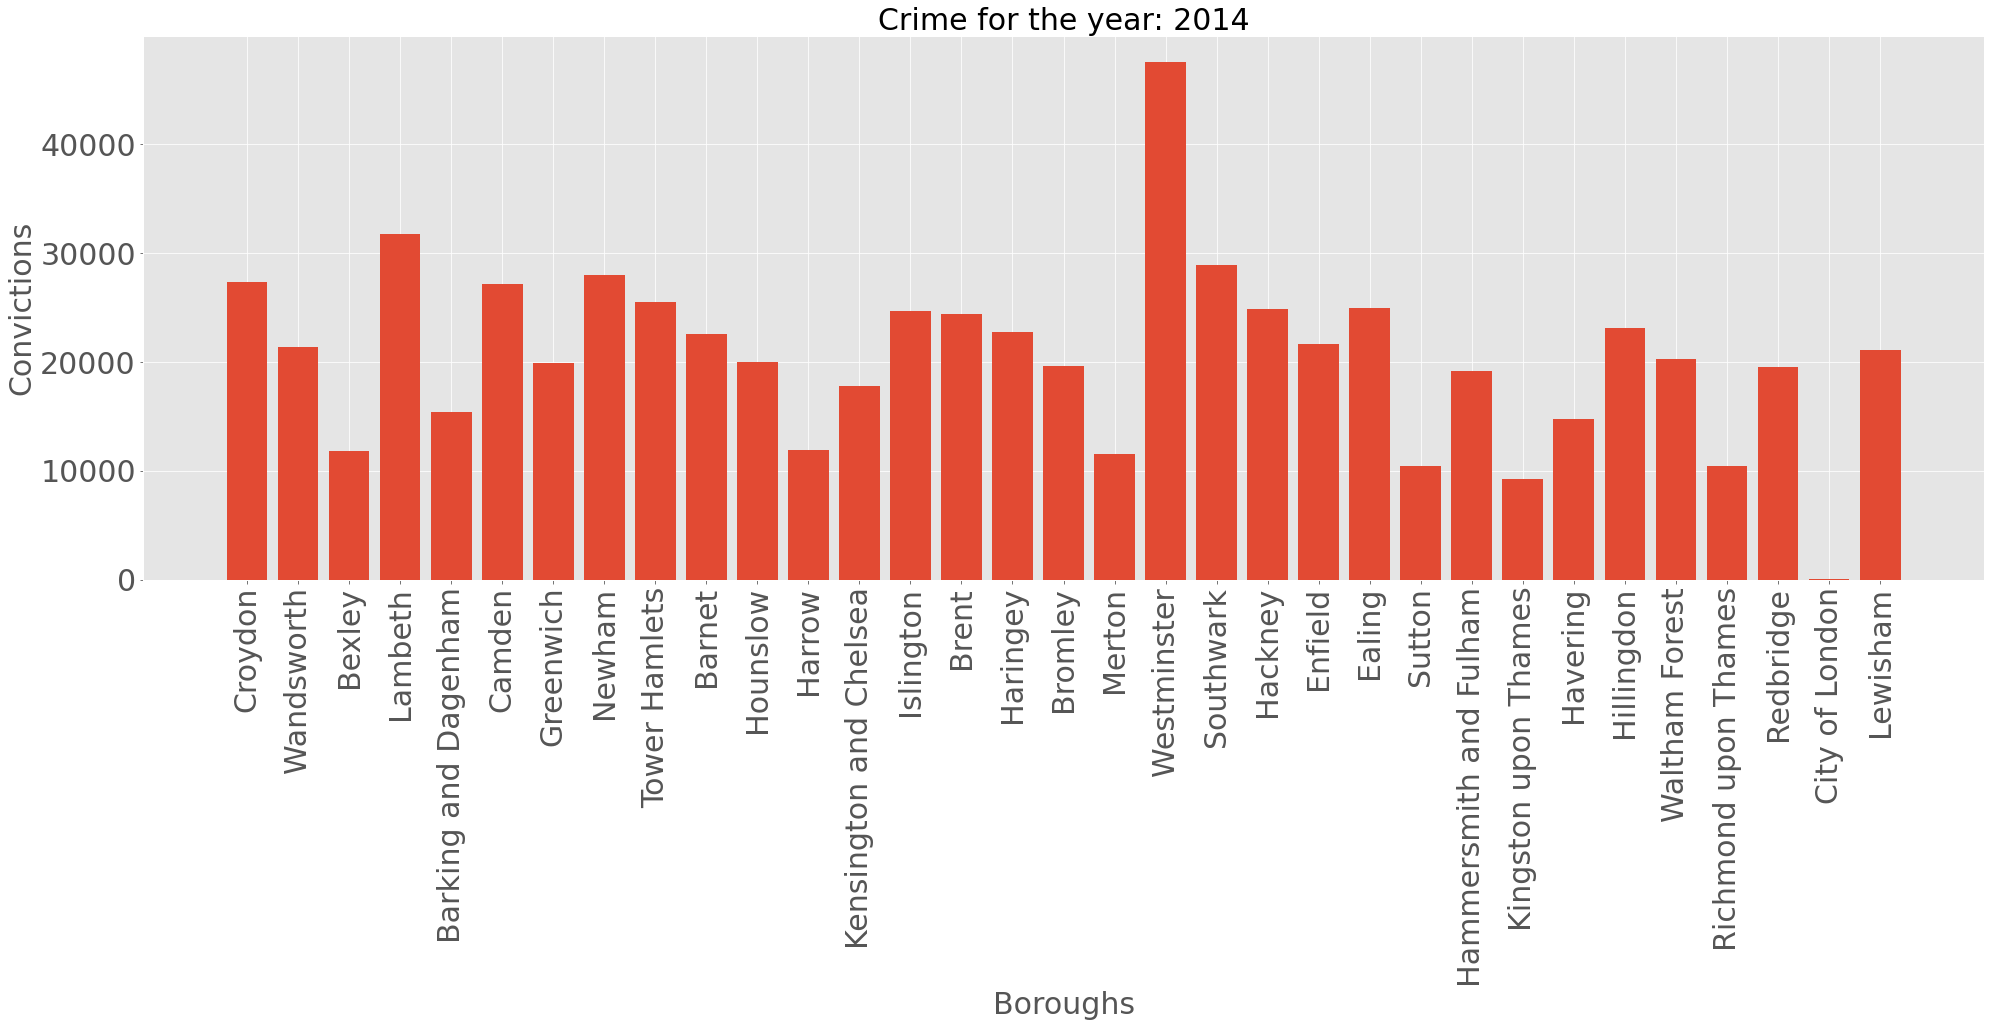

In [35]:
describe_year('2014')